<a href="https://colab.research.google.com/github/hitallocavas/covid-19-data-analysis/blob/main/covid_19_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise Covid 19

*   Hitallo Cavalcanti
*   Leandro Moura




###Inicializando

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
from sklearn import preprocessing
from mpl_toolkits import mplot3d
from sklearn.neighbors import LocalOutlierFactor

In [2]:
country_profile_variables=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/country_profile_variables.csv",encoding = "ISO-8859-1")
kiva_country_profile_variables=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/kiva_country_profile_variables.csv",encoding = "ISO-8859-1")
country_vaccinations=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/country_vaccinations.csv",encoding = "ISO-8859-1")

In [3]:
# plt.rcParams['figure.figsize'] = [8, 15]
plt.rcParams["figure.figsize"] = [5, 5]

##Conhecendo os dados

###Conhecendo as colunas

country_profile_variables.columns #as é igual à kiva_country_profile_variables. 

In [4]:
country_profile_variables.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [5]:
country_vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

###Imprimindo os dados

In [6]:
country_vaccinations

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4674,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4675,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4676,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,NaN,3138.0,2551.0,0.13,0.13,NaN,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...


In [7]:
country_profile_variables

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2.0,70.7,2.8,3.0,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113.0,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,-99,-99,115,115,1,53,-51,-99,-2.1,0.0,0.0,2.1,78.7/72.8,25.5/15.4,2.8/21.7,-99,...,-99.0,-99,-99,-99,-99,-99

In [8]:
kiva_country_profile_variables

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3.0,3489.1,19.0,28.3,52.8,35.0,15.7,49.3,16.6,55.3/74.2,135,135,1776,3230,-1455,-279,0.3,62.7,-0.1,1.6,77.0/70.6,20.0/16.9,191.2/6.3,19.3,13.2,4.5,2.8,2.8,98.5/98.5,89.0/88.1,46.9/41.6,9.9,115.2,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99
3,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049,0.7,5438.7,6.7,49.9,43.4,36.7,14.2,49.1,5.2,62.0/68.8,131,136,9143,8532,611,-222,1.3,54.6,1.6,2.1,74.6/68.6,23.3/10.1,264.2/2.7,623.3,31.4,6.0,3.4,2.6,105.6/107.4,-99,27.5/23.6,16.8,111.3,77.0,97,13.5,37.5/3.9,2459,61,94.7/77.8,91.6/86.6,0.14,-99
4,Belize,CentralAmerica,22966,375,16.4,99.2,1721,1.2,4789.4,14.6,18.5,66.9,16.1,15.9,67.9,11.5,56.7/83.8,97,97,246,952,-706,-175,2.2,44.0,1.9,2.6,72.7/67.2,31.4/6.2,53.9/15.0,3.1,14.3,5.8,...,6.4,110.4/115.8,81.8/79.8,28.7/17.9,9.4,48.9,41.6,117,60.1,0.5/1.4,9,36,98.9/100.0,93.5/88.2,1.68,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Vietnam,South-easternAsia,330967,95541,308.1,98.0,193241,6.7,2067.9,18.9,37.0,44.2,41.8,22.9,35.2,2.2,73.9/83.3,136,134,176632,174111,2520,906,1.1,33.6,3.0,2.0,8

### Não há NAs em (kiva_)country_profile_variables, mas...

In [9]:
country_profile_variables.isna().drop_duplicates()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
kiva_country_profile_variables.isna().drop_duplicates()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


>Verificando se o -99 faz papel de NA através da moda.

In [11]:
columns_dict = {}
i = 0
for name in country_profile_variables.columns:
  columns_dict[name] = i
  columns_dict[i] = name
  i+=1

columns_dict

{0: 'country',
 1: 'Region',
 10: 'Economy: Industry (% of GVA)',
 11: 'Economy: Services and other activity (% of GVA)',
 12: 'Employment: Agriculture (% of employed)',
 13: 'Employment: Industry (% of employed)',
 14: 'Employment: Services (% of employed)',
 15: 'Unemployment (% of labour force)',
 16: 'Labour force participation (female/male pop. %)',
 17: 'Agricultural production index (2004-2006=100)',
 18: 'Food production index (2004-2006=100)',
 19: 'International trade: Exports (million US$)',
 2: 'Surface area (km2)',
 20: 'International trade: Imports (million US$)',
 21: 'International trade: Balance (million US$)',
 22: 'Balance of payments, current account (million US$)',
 23: 'Population growth rate (average annual %)',
 24: 'Urban population (% of total population)',
 25: 'Urban population growth rate (average annual %)',
 26: 'Fertility rate, total (live births per woman)',
 27: 'Life expectancy at birth (females/males, years)',
 28: 'Population age distribution (0-14 

In [12]:
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)

In [13]:
#o drop é para remover as colunas que não possuem moda
country_profile_variables.drop(columns=[0, 3, 29]).mode()

,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,Caribbean,-99,4.0,100.2,-99.0,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,...,.../...,-99.0,-99.0,-99,-99,-99,-99,1.2,100.0,0.1,1.5,-99,.../...,-99,-99,-99.0,...,-99,-99,-99,-99,-99.0,-99,-99,49,-99,-99,0.0,-99.0,100.0/100.0,-99,-99,-99.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)

In [15]:
kiva_country_profile_variables.drop(columns=[0, 2, 4, 16, 29]).mode()

,1,3,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,EasternAfrica,2930.0,99.5,-99.0,2.8,-99.0,19.0,28.3,37.4,2.0,4.8,40.3,2.4,111.0,122.0,-99.0,-99.0,-99.0,-99,1.6,38.6,3.0,2.6,74.9/70.7,29.0/8.4,~0.0,46.5,-99.0,...,...,-99,.../...,.../...,-99.0,87.1,18.0,31.0,8.1,-99,31.0,12.0,100.0/100.0,100.0/100.0,-99.0,-99.0
1,NaN,NaN,NaN,NaN,7.0,1106.4,NaN,NaN,NaN,19.6,8.7,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.9,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.../...,NaN,NaN,NaN,NaN,19.0,42.0,50.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,14.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,58.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.4,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)

>Percebe-se que o -99 aparece com frequência em algumas colunas da tabela. Na country_profile_variables, observa-se, por exemplo, nas colunas de 6 a 14, já em kiva_country_profile_variables em 19 a 22. Há outros valores que são recorrentes e parecem não informar valor, como na coluna 34 ou 36 do kiva_country onde aparecem, respectivamente, "..." e ".../...". A verificar se faz sentindo, nestas colunas, o valor -99.

In [17]:
columns_dict[6]

'GDP: Gross domestic product (million current US$)'

In [18]:
columns_dict[7]

'GDP growth rate (annual %, const. 2005 prices)'

In [19]:
columns_dict[8]

'GDP per capita (current US$)'

In [20]:
columns_dict[19]

'International trade: Exports (million US$)'

In [21]:
columns_dict[20]

'International trade: Imports (million US$)'

In [22]:
columns_dict[21]

'International trade: Balance (million US$)'

####Conclusão
>Estes diferentes contextos indicam que as colunas reference-se a características econômicas e demográficas. Assim, por conhecimento do domínio, assume-se que é desprezível a chance da moda, ao acaso, ser -99, além deste valor ser irreal para o contexto do domínio. Desta forma, concluí-se que -99 e afins("..." e ".../...") estão fazendo o papel de NAs nestes conjunto de dados.

>Além disto, esta falta de uniformidade se tornaria um desafio para tirar itens repetidos quando concatenadas os conjuntos de dados de kiva_ e country_profile_variables. Isto porque os tipos de objetos das tabelas poderiam ser diferentes, pois o infer_objects do pandas se confundiria por causa dos caracteres estranhos presente em uma das tabelas e em outra não. Abaixo segue um exemplo:

In [23]:
country_profile_variables.dtypes == kiva_country_profile_variables.dtypes 

country                                                        True
Region                                                         True
Surface area (km2)                                            False
Population in thousands (2017)                                 True
Population density (per km2, 2017)                             True
Sex ratio (m per 100 f, 2017)                                  True
GDP: Gross domestic product (million current US$)              True
GDP growth rate (annual %, const. 2005 prices)                 True
GDP per capita (current US$)                                   True
Economy: Agriculture (% of GVA)                               False
Economy: Industry (% of GVA)                                   True
Economy: Services and other activity (% of GVA)                True
Employment: Agriculture (% of employed)                       False
Employment: Industry (% of employed)                          False
Employment: Services (% of employed)            

####Dividindo colunas

In [24]:
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)
country_profile_variables
#colunas a serem quebradas: 16, 27, 28, 29, 35, 36, 37, 43, 46, 47

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2.0,70.7,2.8,3.0,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113.0,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,-99,-99,115,115,1,53,-51,-99,-2.1,0.0,0.0,2.1,78.7/72.8,25.5/15.4,2.8/21.7,-99,...,-99.0,-99,-99,-99,-99,-99,-99.0,-99,9.0,89,41.6,~0.0/1.6,-99,26,-99,-99,-99,-99
225,Western Sahara,NorthernAfrica,266000,553,2.1,110.1,-99,-99,-99.0,-99,-99.0,-99.0,37.4,27.9,34.7,6.8,28.6/83.3,100,100,-99,-99,-99,-99,1.8,80.9,3.3,2.6,70.3/66.9,28.1/5.4,5.2/0.9,-99,34.1,-99.0,-99,-99,-99,-99,-99,-99.0,-99,-99,49,2.7,-99,-99,-99,-99,-99,-99,-99
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,36.9,48.4,32.9,17.9,49.2,16.1,26.2/73.7,136,137,570,6861,-6291,-3026,2.6,34.6,4.0,4.4,65.6/62.8,39.9/4.6,344.1/1.3,3371.4,47.2,5.6,0.3,...,88.9/105.7,39.5/57.4,6.1/13.7,0.0,68.0,25.1,298,1.0,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,32.3,59.5,54.8,9.9,35.3,7.4,69.9/80.9,179,180,6505,7442,-937,-768,3.0,40.9,4.3,5.2,61.9/57.5,44.8/3.7,127.9/0.8,55.3,53.8,5.0,0.2,...,104.0/103.3,-99,3.4/4.5,18.0,74.5,21.0,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99


Renomar as colunas para o mesmo nome pode implicar em algumas falhas para algoritmos que utilize o nome das colunas como critério de identificação. Portanto, será necessário diferenciá-las. Para isto, será utilizado um mapeamento no próprio dicionário para fazer o redicionamento.

In [25]:
for i in [16, 27, 28, 29, 35, 36, 37, 43, 46, 47]:
  columns_dict[i + 60] = columns_dict[i] + ' first'
  columns_dict[i + 120] = columns_dict[i] + ' second'
  columns_dict[columns_dict[i] + ' first'] = i + 60
  columns_dict[columns_dict[i] + ' second'] = i + 120
  kiva_country_profile_variables = pd.concat([kiva_country_profile_variables.drop(columns=[i]), kiva_country_profile_variables[i].str.split("/", expand=True).rename(columns={0:i+60, 1:i+120})], axis=1)
  country_profile_variables = pd.concat([country_profile_variables.drop(columns=[i]), country_profile_variables[i].str.split("/", expand=True).rename(columns={0:i+60, 1:i+120})], axis=1)

country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)

kiva_country_profile_variables = kiva_country_profile_variables.sort_index(axis=1)
country_profile_variables = country_profile_variables.sort_index(axis=1)

####Convertendo dados para NA

In [26]:
pd.set_option('display.max_rows', None)

In [27]:
def myFunc(x):
  for i in range(x.size):
    try:
      x[i] = float(x[i])
      if (x[i] == -99.0):
        x[i] = np.nan
    except:
      if (x[i] == None or x[i] == '...'):
        x[i] = np.nan
      elif (x[i][0] == '~' or x[i][0] == '-'): #para o caso -~0
        x[i] = 0.0
  return x
country_profile_variables = country_profile_variables.transform(myFunc)
kiva_country_profile_variables = kiva_country_profile_variables.transform(myFunc)
country_profile_variables

,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Region,Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),country
0,125.0,-5121,63.0,23.3,23.3,53.3,3.3,91.1,131.6,39.7,70.7,3.7,13.3,61.6,10,28.5,5.0,78.2,47,5.3,125.0,9.8,0.3,-2.4,623.2,20270.0,0.3,8.2,42.0,68.6,382.4,1.2,-2110,1458,3568,19.3,83.6,63.5,61,61.6,8.3,NaN,45.1,27,21.43,43.2,4.1,54.4,3.2,35530,1513.1,SouthernAsia,27.7,106.3,652864,2.1,8.6,26.7,4,Afghanistan
1,134.0,-1222,84.0,22.4,26.0,51.7,3.5,111.7,115.5,92.5,98.8,68.1,48.7,41.4,18.3,40.3,36.0,94.9,95.2,1.7,134.0,5.7,2,2.6,3984.2,11541.0,1.3,5.9,130.0,14.6,57.6,2,-2707,1962,4669,40.2,61,79.9,75.6,106.4,63.3,NaN,95.5,90.2,2.96,17.4,19,106.9,-0.1,2930,8.8,SouthernEurope,22.9,101.9,28748,28.2,15.8,57.4,2.2,Albania
2,160.0,-27229,5900.0,12.2,37.3,50.5,NaN,112.7,119.5,101.7,98.1,45.1,28.9,10.8,34.5,54.7,55.0,84.3,81.8,3,161.0,145.4,3.7,3.8,4154.1,164779.0,NaN,7.2,135.0,27.7,242.4,0.6,-17099,29992,47091,17,70.7,76.5,74.1,113,38.2,NaN,89.8,82.2,0.05,29.3,9.4,17.3,2,41318,99.8,NorthernAfrica,31.6,102.0,2.38174e+06,0.8,11.4,70.7,2.8,Algeria
3,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,100,2.6,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,9.6,23.2,41.8,NaN,NaN,NaN,NaN,NaN,77.8,71.1,NaN,NaN,NaN,62.5,62.5,NaN,33.3,9,278.2,0,56,NaN,Polynesia,NaN,103.6,199,87.9,NaN,87.2,-0.1,American Samoa
4,NaN,NaN,1.0,0.5,10.8,88.6,3.3,N

In [28]:
kiva_country_profile_variables

,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Region,Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),country
0,125.0,-5121,63.0,23.3,23.3,53.3,3.3,91.1,131.6,39.7,70.7,3.7,13.3,61.6,10.0,28.5,5.0,78.2,47,5.3,125.0,9.8,0.3,-2.4,623.2,20270.0,0.3,8.2,42,68.6,382.4,1.2,-2110.0,1458.0,3568.0,19.3,83.6,63.5,61,61.6,8.3,NaN,45.1,27,21.43,43.2,4.1,54.4,3.2,35530,1513.1,SouthernAsia,27.7,106.3,652864,2.1,8.6,26.7,4.0,Afghanistan
1,134.0,-1222,84.0,22.4,26.0,51.7,3.5,111.7,115.5,92.5,98.8,68.1,48.7,41.4,18.3,40.3,36.0,94.9,95.2,1.7,134.0,5.7,2,2.6,3984.2,11541.0,1.3,5.9,130,14.6,57.6,2,-2707.0,1962.0,4669.0,40.2,61,79.9,75.6,106.4,63.3,NaN,95.5,90.2,2.96,17.4,19,106.9,-0.1,2930,8.8,SouthernEurope,22.9,101.9,28748,28.2,15.8,57.4,2.2,Albania
2,135.0,-279,48.0,19.0,28.3,52.8,2.8,98.5,98.5,89,88.1,46.9,41.6,35.0,15.7,49.3,46.0,100,100,1.6,135.0,5.5,1.8,3,3489.1,10529.0,2.8,4.5,114,13.2,191.2,6.3,-1455.0,1776.0,3230.0,55.3,74.2,77,70.6,115.2,58.2,NaN,96.2,78.2,3.17,20,16.9,102.9,0.3,2930,19.3,WesternAsia,9.9,88.8,29743,11.7,16.6,62.7,-0.1,Armenia
3,131.0,-222,2459.0,6.7,49.9,43.4,2.6,105.6,107.4,NaN,NaN,27.5,23.6,36.7,14.2,49.1,61.0,94.7,77.8,2.1,136.0,37.5,3.9,0.7,5438.7,53049.0,3.4,6.0,97,31.4,264.2,2.7,611.0,9143.0,8532.0,62,68.8,74.6,68.6,111.3,77.0,NaN,91.6,86.6,0.14,23.3,10.1,118.9,1.3,9828,623.3,WesternAsia,16.8,99.3,86600,13.5,5.2,54.6,1.6,Azerba

In [29]:
pd.reset_option("max_rows")

##Concatenando (kiva_)country_profile_variables

In [30]:
country_profile_variables.shape[0]

229

In [31]:
kiva_country_profile_variables.shape[0]

86

In [32]:
kiva_country_profile_variables.infer_objects().dtypes == kiva_country_profile_variables.infer_objects().dtypes 

Agricultural production index (2004-2006=100)                        True
Balance of payments, current account (million US$)                   True
CO2 emission estimates (million tons/tons per capita)                True
Economy: Agriculture (% of GVA)                                      True
Economy: Industry (% of GVA)                                         True
Economy: Services and other activity (% of GVA)                      True
Education: Government expenditure (% of GDP)                         True
Education: Primary gross enrol. ratio (f/m per 100 pop.) first       True
Education: Primary gross enrol. ratio (f/m per 100 pop.) second      True
Education: Secondary gross enrol. ratio (f/m per 100 pop.) first     True
Education: Secondary gross enrol. ratio (f/m per 100 pop.) second    True
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first      True
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second     True
Employment: Agriculture (% of employed

>Como os tipos são diferentes em algumas colunas, foi necessário normalizá-las para poder utilizar corretamente o drop_duplicates

In [33]:
country_profiles = pd.concat([kiva_country_profile_variables, country_profile_variables])
pd.set_option('display.max_rows', None)
country_profiles.sort_values(by=['country'])


,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Region,Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),country
0,125.0,-5121,63.0,23.3,23.3,53.3,3.3,91.1,131.6,39.7,70.7,3.7,13.3,61.6,10,28.5,5.0,78.2,47,5.3,125.0,9.8,0.3,-2.4,623.2,20270.0,0.3,8.2,42.0,68.6,382.4,1.2,-2110,1458,3568,19.3,83.6,63.5,61,61.6,8.3,NaN,45.1,27,21.43,43.2,4.1,54.4,3.2,35530,1513.1,SouthernAsia,27.7,106.3,652864,2.1,8.6,26.7,4,Afghanistan
0,125.0,-5121,63.0,23.3,23.3,53.3,3.3,91.1,131.6,39.7,70.7,3.7,13.3,61.6,10,28.5,5.0,78.2,47,5.3,125.0,9.8,0.3,-2.4,623.2,20270.0,0.3,8.2,42.0,68.6,382.4,1.2,-2110,1458,3568,19.3,83.6,63.5,61,61.6,8.3,NaN,45.1,27,21.43,43.2,4.1,54.4,3.2,35530,1513.1,SouthernAsia,27.7,106.3,652864,2.1,8.6,26.7,4,Afghanistan
1,134.0,-1222,84.0,22.4,26.0,51.7,3.5,111.7,115.5,92.5,98.8,68.1,48.7,41.4,18.3,40.3,36.0,94.9,95.2,1.7,134.0,5.7,2,2.6,3984.2,11541.0,1.3,5.9,130.0,14.6,57.6,2,-2707,1962,4669,40.2,61,79.9,75.6,106.4,63.3,NaN,95.5,90.2,2.96,17.4,19,106.9,-0.1,2930,8.8,SouthernEurope,22.9,101.9,28748,28.2,15.8,57.4,2.2,Albania
1,134.0,-1222,84.0,22.4,26.0,51.7,3.5,111.7,115.5,92.5,98.8,68.1,48.7,41.4,18.3,40.3,36.0,94.9,95.2,1.7,134.0,5.7,2,2.6,3984.2,11541.0,1.3,5.9,130.0,14.6,57.6,2,-2707,1962,4669,40.2,61,79.9,75.6,106.4,63.3,NaN,95.5,90.2,2.96,17.4,19,106.9,-0.1,2930,8.8,SouthernEurope,22.9,101.9,28748,28.2,15.8,57.4,2.2,Albania
2,160.0,-2722

In [34]:
pd.reset_option("max_rows")

###Tratando linhas repetidas

In [35]:
country_profiles['country'].mode()

0     Afghanistan
1         Albania
2         Armenia
3      Azerbaijan
4          Belize
         ...     
71        Ukraine
72        Vanuatu
73          Yemen
74         Zambia
75       Zimbabwe
Length: 76, dtype: object

In [36]:
country_profiles = country_profiles.drop_duplicates().sort_values(by='country').reset_index(drop=True)
country_profiles['country'].mode()

0                    Afghanistan
1                        Albania
2                        Algeria
3                 American Samoa
4                        Andorra
                 ...            
234    Wallis and Futuna Islands
235               Western Sahara
236                        Yemen
237                       Zambia
238                     Zimbabwe
Length: 239, dtype: object

In [37]:
country_profiles

,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Region,Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),country
0,125.0,-5121,63.0,23.3,23.3,53.3,3.3,91.1,131.6,39.7,70.7,3.7,13.3,61.6,10,28.5,5.0,78.2,47,5.3,125.0,9.8,0.3,-2.4,623.2,20270.0,0.3,8.2,42.0,68.6,382.4,1.2,-2110,1458,3568,19.3,83.6,63.5,61,61.6,8.3,NaN,45.1,27,21.43,43.2,4.1,54.4,3.2,35530,1513.1,SouthernAsia,27.7,106.3,652864,2.1,8.6,26.7,4,Afghanistan
1,134.0,-1222,84.0,22.4,26.0,51.7,3.5,111.7,115.5,92.5,98.8,68.1,48.7,41.4,18.3,40.3,36.0,94.9,95.2,1.7,134.0,5.7,2,2.6,3984.2,11541.0,1.3,5.9,130.0,14.6,57.6,2,-2707,1962,4669,40.2,61,79.9,75.6,106.4,63.3,NaN,95.5,90.2,2.96,17.4,19,106.9,-0.1,2930,8.8,SouthernEurope,22.9,101.9,28748,28.2,15.8,57.4,2.2,Albania
2,160.0,-27229,5900.0,12.2,37.3,50.5,NaN,112.7,119.5,101.7,98.1,45.1,28.9,10.8,34.5,54.7,55.0,84.3,81.8,3,161.0,145.4,3.7,3.8,4154.1,164779.0,NaN,7.2,135.0,27.7,242.4,0.6,-17099,29992,47091,17,70.7,76.5,74.1,113,38.2,NaN,89.8,82.2,0.05,29.3,9.4,17.3,2,41318,99.8,NorthernAfrica,31.6,102.0,2.38174e+06,0.8,11.4,70.7,2.8,Algeria
3,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,100,2.6,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,9.6,23.2,41.8,NaN,NaN,NaN,NaN,NaN,77.8,71.1,NaN,NaN,NaN,62.5,62.5,NaN,33.3,9,278.2,0,56,NaN,Polynesia,NaN,103.6,199,87.9,NaN,87.2,-0.1,American Samoa
4,NaN,NaN,1.0,0.5,10.8,88.6,3.3,N

###Inferindo tipos
>Alguns algoritmos utilizam a informação do tipo para selecionar a tabela. Alguns itens foram representados como objetos na tabela anterior por possuírem símbolos como '/' ou '~'. Agora que as colunas foram devidamente dividias, cada coluna representa um número, a excelção das que são nome. Assim, o que antes era objeto agora pode ser inferido como número pelo pandas. Isto é importante para que os algoritmos que utilizem apenas números também utilizem estas tabelas.

>OBS: a etapa de divisão da coluna teria sido melhor se fosse feita após concatenação. Porém, pelo fluxo de trabalho, acabou ficando desse jeito.

In [38]:
country_profiles.dtypes

Agricultural production index (2004-2006=100)                        float64
Balance of payments, current account (million US$)                    object
CO2 emission estimates (million tons/tons per capita)                float64
Economy: Agriculture (% of GVA)                                       object
Economy: Industry (% of GVA)                                         float64
Economy: Services and other activity (% of GVA)                      float64
Education: Government expenditure (% of GDP)                          object
Education: Primary gross enrol. ratio (f/m per 100 pop.) first        object
Education: Primary gross enrol. ratio (f/m per 100 pop.) second       object
Education: Secondary gross enrol. ratio (f/m per 100 pop.) first      object
Education: Secondary gross enrol. ratio (f/m per 100 pop.) second     object
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first       object
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second      object

In [39]:
country_profiles = country_profiles.infer_objects()
country_profiles.dtypes

Agricultural production index (2004-2006=100)                        float64
Balance of payments, current account (million US$)                   float64
CO2 emission estimates (million tons/tons per capita)                float64
Economy: Agriculture (% of GVA)                                      float64
Economy: Industry (% of GVA)                                         float64
Economy: Services and other activity (% of GVA)                      float64
Education: Government expenditure (% of GDP)                         float64
Education: Primary gross enrol. ratio (f/m per 100 pop.) first       float64
Education: Primary gross enrol. ratio (f/m per 100 pop.) second      float64
Education: Secondary gross enrol. ratio (f/m per 100 pop.) first     float64
Education: Secondary gross enrol. ratio (f/m per 100 pop.) second    float64
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first      float64
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second     float64

##Explorando

In [40]:
country_vaccinations[country_vaccinations["iso_code"] == "BRA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
552,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
553,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
554,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
555,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
556,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
557,Brazil,BRA,2021-01-21,136519.0,136519.0,NaN,107976.0,27304.0,0.06,0.06,NaN,128.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
558,Brazil,BRA,2021-01-22,245877.0,245877.0,NaN,109358.0,40980.0,0.12,0.12,NaN,193.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
559,Brazil,BRA,2021-01-23,537774.0,537774.0,NaN,291897.0,76825.0,0.25,0.25,NaN,361.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
560,Brazil,BRA,2021-01-24,604722.0,604722.0,NaN,66948.0,86373.0,0.28,0.28,NaN,406.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
561,Brazil,BRA,2021-01-25,700608.0,700608.0,NaN,95886.0,99928.0,0.33,0.33,NaN,470.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/


In [41]:
country_vaccinations[country_vaccinations["iso_code"] == "USA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4508,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4509,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4510,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4511,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4512,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4513,United States,USA,2020-12-25,NaN,NaN,NaN,NaN,215238.0,NaN,NaN,NaN,644.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4514,United States,USA,2020-12-26,1944585.0,1944585.0,NaN,NaN,231396.0,0.58,0.58,NaN,692.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4515,United States,USA,2020-12-27,NaN,NaN,NaN,NaN,211379.0,NaN,NaN,NaN,632.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4516,United States,USA,2020-12-28,2127143.0,2127143.0,NaN,NaN,216147.0,0.64,0.64,NaN,646.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4517,United States,USA,2020-12-29,NaN,NaN,NaN,NaN,235685.0,NaN,NaN,NaN,705.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [42]:
pd.set_option('display.max_rows', None)
country_vaccinations.groupby("iso_code").last()["country"]
#Lembrar-se de resetar display.max_rows

iso_code
AIA                         Anguilla
ALB                          Albania
AND                          Andorra
ARE             United Arab Emirates
ARG                        Argentina
AUS                        Australia
AUT                          Austria
AZE                       Azerbaijan
BEL                          Belgium
BGD                       Bangladesh
BGR                         Bulgaria
BHR                          Bahrain
BLR                          Belarus
BMU                          Bermuda
BOL                          Bolivia
BRA                           Brazil
BRB                         Barbados
CAN                           Canada
CHE                      Switzerland
CHL                            Chile
CHN                            China
COL                         Colombia
CRI                       Costa Rica
CYM                   Cayman Islands
CYP                           Cyprus
CZE                          Czechia
DEU                          

In [43]:
pd.reset_option("max_rows")

In [44]:
country_vaccinations[country_vaccinations["iso_code"] == "ALB"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [45]:
country_vaccinations[country_vaccinations["iso_code"] == "CHN"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
860,China,CHN,2020-12-15,1500000.0,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
861,China,CHN,2020-12-16,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
862,China,CHN,2020-12-17,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
863,China,CHN,2020-12-18,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
864,China,CHN,2020-12-19,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
865,China,CHN,2020-12-20,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
866,China,CHN,2020-12-21,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
867,China,CHN,2020-12-22,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
868,China,CHN,2020-12-23,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
869,China,CHN,2020-12-24,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...


In [46]:
country_vaccinations[country_vaccinations["iso_code"] == "IND"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1974,India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1975,India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1976,India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1977,India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1978,India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1979,India,IND,2021-01-20,806484.0,806484.0,NaN,131649.0,161297.0,0.06,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1980,India,IND,2021-01-21,1043534.0,1043534.0,NaN,237050.0,173922.0,0.08,0.08,NaN,126.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1981,India,IND,2021-01-22,1390592.0,1390592.0,NaN,347058.0,198656.0,0.10,0.10,NaN,144.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1982,India,IND,2021-01-23,1582201.0,1582201.0,NaN,191609.0,198717.0,0.11,0.11,NaN,144.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1983,India,IND,2021-01-24,1615504.0,1615504.0,NaN,33303.0,198743.0,0.12,0.12,NaN,144.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...


In [47]:
country_vaccinations[country_vaccinations["iso_code"] == "RUS"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3603,Russia,RUS,2020-12-15,28500.0,28500.0,NaN,NaN,NaN,0.02,0.02,NaN,NaN,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3604,Russia,RUS,2020-12-16,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3605,Russia,RUS,2020-12-17,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3606,Russia,RUS,2020-12-18,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3607,Russia,RUS,2020-12-19,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3608,Russia,RUS,2020-12-20,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3609,Russia,RUS,2020-12-21,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3610,Russia,RUS,2020-12-22,52000.0,52000.0,NaN,NaN,3357.0,0.04,0.04,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3611,Russia,RUS,2020-12-23,NaN,NaN,NaN,NaN,12592.0,NaN,NaN,NaN,86.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3612,Russia,RUS,2020-12-24,NaN,NaN,NaN,NaN,21827.0,NaN,NaN,NaN,150.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats


In [48]:
country_vaccinations[country_vaccinations["iso_code"] == "AUT"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
189,Austria,AUT,2021-01-10,NaN,6784.0,NaN,NaN,NaN,NaN,0.08,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
190,Austria,AUT,2021-01-11,NaN,11559.0,NaN,NaN,NaN,NaN,0.13,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
191,Austria,AUT,2021-01-12,NaN,13172.0,NaN,NaN,NaN,NaN,0.15,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
192,Austria,AUT,2021-01-13,21259.0,20064.0,NaN,NaN,NaN,0.24,0.22,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
193,Austria,AUT,2021-01-14,47087.0,29359.0,NaN,25828.0,6457.0,0.52,0.33,NaN,717.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
194,Austria,AUT,2021-01-15,67473.0,39751.0,NaN,20386.0,9243.0,0.75,0.44,NaN,1026.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
195,Austria,AUT,2021-01-16,76066.0,50402.0,NaN,8593.0,9134.0,0.84,0.56,NaN,1014.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
196,Austria,AUT,2021-01-17,82005.0,55450.0,NaN,5939.0,8678.0,0.91,0.62,NaN,964.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
197,Austria,AUT,2021-01-18,88973.0,60708.0,304.0,6968.0,9673.0,0.99,0.67,0.00,1074.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
198,Austria,AUT,2021-01-19,97389.0,70474.0,1034.0,8416.0,10876.0,1.08,0.78,0.01,1208.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...


###Lidando com NAs de total_vaccinations
>total de vacinas é cumulativo. Desta forma, é possível trocar os NAs que estiverem entre duas linhas preenchidas na coluna total_vaccinations pela interpolação das mesmas. A interpolação será linear porque assume-se que a capacidade de vacinação diaria dos países não crescem de maneira significativa de um dia para o outro, a menos que ocorra algum evento, como a chegada de uma nova remersa de vacinas.

>É preciso, no entanto, cuidar para os casos em que o primeiro dia é NA, pois isto resultará numa interpolação errônea. Para tanto, substituirei todos os NAs dos primeiros dias por 0.

In [49]:
country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
189,Austria,AUT,2021-01-10,NaN,6784.0,NaN,NaN,NaN,NaN,0.08,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
677,Canada,CAN,2020-12-19,NaN,8734.0,NaN,NaN,NaN,NaN,0.02,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...
2475,Latvia,LVA,2020-12-28,NaN,595.0,NaN,NaN,NaN,NaN,0.03,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...


>Como pode ser observado, há três casos em que a interpolação iria apresentar um resultado diferente do esperado. Isto porque espera-se que o primeiro dia seja zero, e nestes casos, o primeiro dia seria a interpolação do primerio número válido anterior à linha e do próximo número válido. Assim, ao setar estes números para zero, espera-se resolver este problema.

In [50]:
for row in country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()].loc[:,"total_vaccinations"].index:
  country_vaccinations.loc[row, "total_vaccinations"] = 0

country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website


In [51]:
country_vaccinations["total_vaccinations"] = country_vaccinations["total_vaccinations"].interpolate().astype(int).astype(float)

In [52]:
country_vaccinations[country_vaccinations["iso_code"] == "USA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4508,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4509,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4510,United States,USA,2020-12-22,811071.0,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4511,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4512,United States,USA,2020-12-24,1320211.0,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4513,United States,USA,2020-12-25,1632398.0,NaN,NaN,NaN,215238.0,NaN,NaN,NaN,644.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4514,United States,USA,2020-12-26,1944585.0,1944585.0,NaN,NaN,231396.0,0.58,0.58,NaN,692.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4515,United States,USA,2020-12-27,2035864.0,NaN,NaN,NaN,211379.0,NaN,NaN,NaN,632.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4516,United States,USA,2020-12-28,2127143.0,2127143.0,NaN,NaN,216147.0,0.64,0.64,NaN,646.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4517,United States,USA,2020-12-29,2460865.0,NaN,NaN,NaN,235685.0,NaN,NaN,NaN,705.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [53]:
country_vaccinations[country_vaccinations["iso_code"] == "BRA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
552,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
553,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
554,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
555,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
556,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
557,Brazil,BRA,2021-01-21,136519.0,136519.0,NaN,107976.0,27304.0,0.06,0.06,NaN,128.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
558,Brazil,BRA,2021-01-22,245877.0,245877.0,NaN,109358.0,40980.0,0.12,0.12,NaN,193.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
559,Brazil,BRA,2021-01-23,537774.0,537774.0,NaN,291897.0,76825.0,0.25,0.25,NaN,361.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
560,Brazil,BRA,2021-01-24,604722.0,604722.0,NaN,66948.0,86373.0,0.28,0.28,NaN,406.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
561,Brazil,BRA,2021-01-25,700608.0,700608.0,NaN,95886.0,99928.0,0.33,0.33,NaN,470.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/


In [54]:
country_vaccinations[country_vaccinations["iso_code"] == "CHN"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
860,China,CHN,2020-12-15,1500000.0,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
861,China,CHN,2020-12-16,1687500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
862,China,CHN,2020-12-17,1875000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
863,China,CHN,2020-12-18,2062500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
864,China,CHN,2020-12-19,2250000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
865,China,CHN,2020-12-20,2437500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
866,China,CHN,2020-12-21,2625000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
867,China,CHN,2020-12-22,2812500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
868,China,CHN,2020-12-23,3000000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
869,China,CHN,2020-12-24,3187500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...


###Acerca dos NAs de people_fully_vaccinated
>Em "conhecendo os dados", observou-se, em alguns casos, que total_vaccinations = people_vaccninated + people_fully_vaccinated. Porém, esta regra só é válida para vacinações com duas doses. Isto porque, na primeira dose, conta-se um para a quantidade de vacinas aplicadas (total_vaccinations) e a pessoa entra para a lista de pessoas vacinadas (people_vacinated). Na segunda dose, conta-se mais uma vacina na quantidade de vacinas aplicadas, a pessoa sendo contada na lista de pessoas vacinadas, mas também entra na lista de pessoas completamente vacinadas (people_fully_vaccinated). Portanto, uma estratégia usando esta observação poderia ser válida agora, ela não seria para todo caso, uma vez que, por exemplo, doses únicas (já há vacinas com esta característica) faria uma única dose ser contada duas vezes.


##Extraindo Informações de Dados

###Países com maior e menor porcentagem de vacinação por centena de habitante

>Em country_vaccination já há esta informação. Porém, países se repetem por dia e também estão ordenados alfabeticamente em relação à seus nomes. Para ter este obter esta informação será necessário filtro de última linha agrupada por países na tabela e ordenação da coluna.

In [55]:
country_vaccinations.groupby("country").last().sort_values(by=['total_vaccinations_per_hundred'], ascending=False).head(25)['total_vaccinations_per_hundred']

country
Gibraltar                   109.25
Israel                       94.88
Seychelles                   80.78
United Arab Emirates         60.95
Falkland Islands             49.73
Wales                        32.65
Cayman Islands               32.12
England                      31.65
United Kingdom               31.07
Scotland                     30.94
Guernsey                     29.90
Northern Ireland             29.50
Jersey                       29.00
Bermuda                      27.42
Isle of Man                  25.87
United States                22.99
Maldives                     21.67
Serbia                       21.11
Anguilla                     18.41
Chile                        18.26
Malta                        18.03
Bahrain                      17.70
Turks and Caicos Islands     16.62
Faeroe Islands               13.74
Barbados                     12.79
Name: total_vaccinations_per_hundred, dtype: float64

In [56]:
country_vaccinations.groupby("country").last().sort_values(by=['total_vaccinations_per_hundred'], ascending=False).tail(25)['total_vaccinations_per_hundred']

country
Belarus                0.22
Montenegro             0.21
Myanmar                0.19
Algeria                0.17
Senegal                0.16
Zimbabwe               0.14
Australia              0.13
Kazakhstan             0.12
South Africa           0.12
San Marino             0.10
Bolivia                0.09
El Salvador            0.09
Malaysia               0.08
Cambodia               0.08
South Korea            0.04
Trinidad and Tobago    0.03
Pakistan               0.03
Japan                  0.03
New Zealand            0.03
Ukraine                0.01
Guatemala              0.01
Iran                   0.01
Paraguay               0.01
Egypt                  0.00
Venezuela              0.00
Name: total_vaccinations_per_hundred, dtype: float64

####Analisando Gibraltar

In [57]:
#Não encontrado Gibraltar em kiva_country_profile_variables
country_profile_variables[country_profile_variables["country"] == "Gibraltar"]

,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Region,Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),country
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0,NaN,NaN,NaN,NaN,0.5,16.5,NaN,NaN,NaN,NaN,NaN,31.0,NaN,11.1,34.3,-299,234,533,NaN,NaN,NaN,NaN,129.5,65,NaN,NaN,NaN,NaN,18.1,22.4,3457.1,0.6,35,NaN,SouthernEurope,NaN,101.8,6,0,NaN,100.0,0.1,Gibraltar


In [58]:
country_vaccinations[country_vaccinations["country"] == "Gibraltar"].tail(1)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1728,Gibraltar,GIB,2021-02-28,36808.0,23518.0,13290.0,0.0,911.0,109.25,69.8,39.45,27040.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/136636...


>O estranho índice de 109% de vacinação em Gibraltar é explicado porque conta-se cada aplicação da vacina mesmo que existam vacina cuja eficiência máxima é alcançada através de duas aplicações. Assim, o número de aplicações ultrapassa o número de pessoas, embora isto não signifique que todas as pessoas estão com a proteção máxima conferida pela vacina. Este índice encontra-se em "people_fully_vaccinated_per_hundred", e é de  39.45% da população. Este resultado está de acordo com o observado nos dados do country_profile-variables, onde estima-se que em 2017 haviam 35 milhões de pessoas em Gibraltar.

###Países com maior e menor porcentagem de vacinação completa por centena de habitante
>Semelhante à seção anterior, esta informação já está contida no conjunto de dados. Basta ordená-la e filtrá-la para visualização.

In [59]:
country_vaccinations.groupby("country").last().sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False).head(25)['people_fully_vaccinated_per_hundred']

country
Israel                  39.74
Gibraltar               39.45
Seychelles              23.95
United Arab Emirates    22.12
Cayman Islands          11.80
Isle of Man              9.03
Guernsey                 7.96
Bermuda                  7.66
United States            7.61
Serbia                   7.52
Malta                    6.35
Faeroe Islands           5.16
Iceland                  3.69
Wales                    3.29
Jersey                   3.25
Romania                  3.19
Denmark                  3.18
Poland                   3.15
Greece                   3.14
Norway                   2.99
Ireland                  2.84
Spain                    2.70
Lithuania                2.69
Belgium                  2.66
Hungary                  2.62
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [60]:
country_vaccinations.groupby("country").last().sort_values(by=['people_fully_vaccinated_per_hundred'], na_position='first', ascending=False).tail(25)['people_fully_vaccinated_per_hundred']

country
Luxembourg        1.71
Croatia           1.46
Finland           1.46
Scotland          1.44
United Kingdom    1.20
Canada            1.15
England           1.07
Latvia            0.91
Costa Rica        0.91
Brazil            0.90
Kuwait            0.89
Russia            0.75
Argentina         0.65
Bulgaria          0.56
Morocco           0.44
Mexico            0.44
Indonesia         0.37
Oman              0.37
Chile             0.30
Jordan            0.29
India             0.18
South Africa      0.12
Ecuador           0.04
Albania           0.02
Kazakhstan        0.01
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [61]:
country_vaccinations.groupby("country")["people_fully_vaccinated_per_hundred"].last().isna().count()

118

In [62]:
country_vaccinations.groupby("country").last().dropna().sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False).tail(25)['people_fully_vaccinated_per_hundred']

country
Sweden            2.44
Austria           2.35
France            2.34
Italy             2.33
Czechia           2.27
Turkey            2.13
Singapore         1.88
Luxembourg        1.71
Finland           1.46
Croatia           1.46
United Kingdom    1.20
Canada            1.15
Latvia            0.91
Brazil            0.90
Argentina         0.65
Bulgaria          0.56
Morocco           0.44
Mexico            0.44
Oman              0.37
Indonesia         0.37
Chile             0.30
India             0.18
South Africa      0.12
Ecuador           0.04
Albania           0.02
Name: people_fully_vaccinated_per_hundred, dtype: float64

>Nesta seção observa-se os países que mais vacinaram completamente sua população em porcentual. Isreal é o primeiro, em seguida Gibraltar. Também se vê os países que menos vacinaram completamente até agora, mas que já vacinaram completamente. A contagem dos países que não vacinaram compeltamente ninguém até agora é de 118. Este valor foi obtido através da contagem dos NAs na coluna "people_fully_vaccinated_per_hundred".

>A verificação abaixo é uma pequena tentativa de achar alguma incongruência neste conjunto de dados apoiando-se no fato de que há uma redundância nas colunas people_fully_vaccinated e people_fully_vaccinated_per_hundred. Foi verificado que sempre que uma não é NA, a outra também não é.

In [63]:
country_vaccinations[(country_vaccinations["people_fully_vaccinated"].isnull() & country_vaccinations["people_fully_vaccinated_per_hundred"].notnull()) | 
                     (country_vaccinations["people_fully_vaccinated"].notnull() & country_vaccinations["people_fully_vaccinated_per_hundred"].isnull())]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website


###25 Países com maior e menor média de vacinados por dia

In [64]:
mean_vaccinations_by_country = country_vaccinations[country_vaccinations['total_vaccinations'].notna()].groupby('country').mean()

In [65]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations', ascending=False).head(25)['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
United States           27963811.82
China                   13665587.58
United Kingdom           7719022.88
England                  6583798.96
India                    6097110.33
Israel                   3898525.74
Brazil                   3750814.31
United Arab Emirates     3517731.71
Turkey                   3415373.15
Germany                  2563997.17
Russia                   2245735.47
Italy                    1911633.05
Spain                    1768712.11
France                   1611191.03
Morocco                  1395424.87
Poland                   1287551.02
Bangladesh               1030039.50
Canada                    982946.34
Indonesia                 978233.60
Chile                     873380.46
Mexico                    695294.46
Romania                   626284.39
Serbia                    575044.56
Scotland                  571028.99
Switzerland               448684.72
Name: total_vaccinations, dtype: object

In [66]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations').head(25)['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
San Marino                    35.00
Venezuela                     78.17
Saint Helena                 107.00
Trinidad and Tobago          219.62
Paraguay                     500.00
Egypt                        657.14
Montenegro                   660.71
New Zealand                  730.00
Anguilla                     860.64
Guyana                       923.25
Guatemala                   1112.00
Falkland Islands            1142.94
Macao                       1179.18
Monaco                      1199.55
Liechtenstein               1320.23
Andorra                     1451.48
Mauritius                   1459.88
Albania                     1700.45
Greenland                   2584.00
Ukraine                     2769.50
El Salvador                 3000.00
Turks and Caicos Islands    3216.03
Bolivia                     4269.93
Cambodia                    4547.82
Northern Cyprus             4652.11
Name: total_vaccinations, dtype: object

##Estatísticas Decritivas

In [67]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations')['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
San Marino                   35.00
Venezuela                    78.17
Saint Helena                107.00
Trinidad and Tobago         219.62
Paraguay                    500.00
                          ...     
India                   6097110.33
England                 6583798.96
United Kingdom          7719022.88
China                  13665587.58
United States          27963811.82
Name: total_vaccinations, Length: 118, dtype: object

In [68]:
std_by_country = country_vaccinations[country_vaccinations['daily_vaccinations'].notna()].groupby('country').std()
std_by_country

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Albania,2.564648e+03,1.571506e+03,9.609847e+01,484.586891,284.732515,0.098571,0.054167,0.000000,99.001654
Algeria,2.325883e+04,NaN,NaN,NaN,907.506335,0.120208,NaN,NaN,20.492275
Andorra,5.476894e+02,5.667367e+02,NaN,NaN,18.710130,0.732687,0.732687,NaN,242.231079
Anguilla,7.448729e+02,1.004799e+03,NaN,NaN,57.553453,6.696301,6.696301,NaN,3836.475257
Argentina,2.719991e+05,1.368321e+05,9.828880e+04,19814.917531,8012.149288,0.565201,0.303365,0.217530,177.232399
...,...,...,...,...,...,...,...,...,...
United States,2.364978e+07,1.538919e+07,7.401123e+06,586231.333104,541507.719253,6.968679,4.601357,2.212990,1619.134845
Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venezuela,4.980663e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000


###Agregando dados de Country Profiles e Contry Vaccinations e extraindo correlações

In [69]:
#correlação do histórico de dias
country_profiles_vaccination = pd.merge(country_profiles, country_vaccinations, on='country')
px.imshow(country_profiles_vaccination.corr(), color_continuous_scale='brbg', width=750, height=750)

In [70]:
#correlação do último dia
px.imshow(country_profiles_vaccination.groupby(by='country').last().corr(), color_continuous_scale='brbg', width=750, height=750)

####Para checar colunas:

In [71]:
columns_dict_corr = {}
i = 0
for name in country_profiles_vaccination.corr().columns:
  columns_dict_corr[i] = name
  i+=1

columns_dict_corr

{0: 'Agricultural production index (2004-2006=100)',
 1: 'Balance of payments, current account (million US$)',
 2: 'CO2 emission estimates (million tons/tons per capita)',
 3: 'Economy: Agriculture (% of GVA)',
 4: 'Economy: Industry (% of GVA)',
 5: 'Economy: Services and other activity (% of GVA)',
 6: 'Education: Government expenditure (% of GDP)',
 7: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) first',
 8: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) second',
 9: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) first',
 10: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) second',
 11: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first',
 12: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second',
 13: 'Employment: Agriculture (% of employed)',
 14: 'Employment: Industry (% of employed)',
 15: 'Employment: Services (% of employed)',
 16: 'Energy production, primary (Petajoules)',
 17: 'Energy supply per capi

####Conclusões
>A região de interesse da matriz de correlação é a que está entre as colunas 58 e 66 e entre as linhas 0 e 57. Isto porque esta é a região em que existe a interseção da tabela de dados geoeconômicos e da tabela de vacinas.

>É interessante notar que, em valores absolutos (colunas 58 a 62), a correlação é bem mais evidente que em valores porcentuais por indivíduo (colunas 63 a 66). Isto pode indicar que tais valores absolutos são despresíveis quando normalizados pela população dos países.

>Há uma altíssima correlação entre países com alta emissão de caborno (linha 2) e países com alto PIB (linha 25) com relação à quantidade de vacinas aplicadas na população em valores absolutos. Porém, no PIB per capita (linha 24) esta correlação não demonstra sua força, corroborando a conclusão anterior. Comportamento semelhante é observado no comércio internacional (linhas 32, 33 e 34).

>No último dia nota-se que economias baseadas em serviços (linha 5) está com uma correlação ligeriamente positiva nas vacinas por habiante em geral. Já economias indústrias (linha 4) e agrárias (linha 3) estão com correlações ligeiramente negativas. Algo semelhante se observa na relação de empregos na área de serviços (linha 15) com relação à empregos na área de indústria (linha 14) e agricultura (linha 13).

>A área (linha 53) e o tamanho da população (linha 49) apresentam uma correlação alta correlação positiva de vacinação. Porém, apresentam uma correlação ligeramente baixa de vacinação percentual. Isto pode indicar que países grandes tem maior dificuldade de vacinar suas populações quando comparado aos menores.

##Relação da vacinação por habitante por mulheres no parlamento
>Visualizando coluna "Seats held by woman in national parliaments %"


In [72]:
column_name = 'Seats held by women in national parliaments %'
country_profiles[column_name]

0      27.7
1      22.9
2      31.6
3       NaN
4      32.1
       ... 
234     NaN
235     NaN
236     0.0
237    18.0
238    32.6
Name: Seats held by women in national parliaments %, Length: 239, dtype: float64

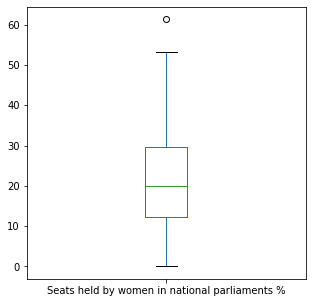

In [73]:
country_profiles[column_name].plot.box(figsize=(5, 5))

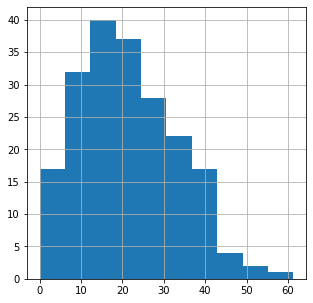

In [74]:
country_profiles[column_name].hist(figsize=(5, 5))

###Retirando outliers e separando grupos
>A ideia é separar em dois grupos: um com países com baixa participação feminina no parlamento, outro com alta participação. Depois, verificar se a distribuição de vacinas aplicadas nestes países são equivalentes.

In [75]:
def show_outliers(df, out_cols = None, T=1.5, verbose=True):
  # Copy of df
  new_df = df.copy()
  init_shape = new_df.shape
  # For each column
  if (out_cols is not None):
    for c in out_cols:
        q1 = new_df[c].quantile(.25)
        q3 = new_df[c].quantile(.75)
        col_iqr = q3 - q1
        col_max = q3 + T * col_iqr
        col_min = q1 - T * col_iqr
        # Filter data without outliers and ignoring nan
        filtered_df = new_df[(new_df[c] > col_max) | (new_df[c] < col_min)]
        if verbose:
            n_out = new_df.shape[0] - filtered_df.shape[0] 
            print(f" Columns {c} had {n_out} outliers removed")
        new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  else:
    q1 = new_df.quantile(.25)
    q3 = new_df.quantile(.75)
    col_iqr = q3 - q1
    col_max = q3 + T * col_iqr
    col_min = q1 - T * col_iqr
    # Filter data without outliers and ignoring nan
    filtered_df = new_df[(new_df > col_max) | (new_df < col_min)]
    if verbose:
        n_out = new_df.shape[0] - filtered_df.shape[0] 
        print(f" Serie had {n_out} outliers removed")
    new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  return new_df
#adapted from https://datascience.stackexchange.com/questions/73274/remove-outliers-from-dataframe-using-pandas-in-python

In [76]:
def remove_outliers(df, out_cols = None, T=1.5, verbose=True):
  # Copy of df
  new_df = df.copy()
  init_shape = new_df.shape
  # For each column
  if (out_cols is not None):
    for c in out_cols:
        q1 = new_df[c].quantile(.25)
        q3 = new_df[c].quantile(.75)
        col_iqr = q3 - q1
        col_max = q3 + T * col_iqr
        col_min = q1 - T * col_iqr
        # Filter data without outliers and ignoring nan
        filtered_df = new_df[(new_df[c] <= col_max) & (new_df[c] >= col_min)]
        if verbose:
            n_out = new_df.shape[0] - filtered_df.shape[0] 
            print(f" Columns {c} had {n_out} outliers removed")
        new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  else:
    q1 = new_df.quantile(.25)
    q3 = new_df.quantile(.75)
    col_iqr = q3 - q1
    col_max = q3 + T * col_iqr
    col_min = q1 - T * col_iqr
    # Filter data without outliers and ignoring nan
    filtered_df = new_df[(new_df <= col_max) & (new_df >= col_min)]
    if verbose:
        n_out = new_df.shape[0] - filtered_df.shape[0] 
        print(f" Serie had {n_out} outliers removed")
    new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  return new_df
#adapted from https://datascience.stackexchange.com/questions/73274/remove-outliers-from-dataframe-using-pandas-in-python

In [77]:
country_profiles[column_name].mode()

0    16.0
dtype: float64

In [78]:
country_profiles[column_name].mean()

21.389999999999997

In [79]:
country_profiles[column_name].median()

19.95

Dada a ordem de grandeza dos valores, vou considerar essa distribuição simétrica.

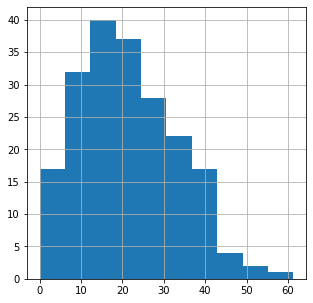

In [80]:
country_profiles[column_name].hist()

In [81]:
woman_paprliaments_without_outliers = remove_outliers(country_profiles, [column_name])

 Columns Seats held by women in national parliaments % had 40 outliers removed
Data reduced by 40 lines, or 16.74 %


In [82]:
low_woman_paprliaments_without_outliers = woman_paprliaments_without_outliers[woman_paprliaments_without_outliers[column_name] <= woman_paprliaments_without_outliers[column_name].median()]
low_woman_paprliaments_without_outliers[column_name]

7      11.1
9       9.9
13     16.8
14     13.2
15      7.5
       ... 
226    19.1
228    16.0
229     0.0
236     0.0
237    18.0
Name: Seats held by women in national parliaments %, Length: 100, dtype: float64

A que menos se aproxima de uma simétrica é esta. Porém, tem poucos outliers pelo método de tukey. Então acredito que não haja problemas em deixar assim mesmo.

In [83]:
low_woman_paprliaments_without_outliers[column_name].mode()

0    16.0
dtype: float64

In [84]:
low_woman_paprliaments_without_outliers[column_name].median()

12.3

In [85]:
low_woman_paprliaments_without_outliers[column_name].mean()

11.824000000000002

In [86]:
total_vaccination_low_woman_parlament = country_vaccinations.groupby(by='iso_code').last()[country_vaccinations.groupby(by='iso_code').last()['country'].isin(low_woman_paprliaments_without_outliers['country'])]['total_vaccinations_per_hundred']
total_vaccination_low_woman_parlament.shape

(35,)

In [87]:
high_woman_paprliaments_without_outliers = woman_paprliaments_without_outliers[woman_paprliaments_without_outliers[column_name] > woman_paprliaments_without_outliers[column_name].median()]
high_woman_paprliaments_without_outliers[column_name]

0      27.7
1      22.9
2      31.6
4      32.1
5      38.2
       ... 
227    20.2
230    22.2
231    26.7
232    26.7
238    32.6
Name: Seats held by women in national parliaments %, Length: 99, dtype: float64

In [88]:
high_woman_paprliaments_without_outliers[column_name].median()

29.5

In [89]:
high_woman_paprliaments_without_outliers[column_name].mode()

0    26.7
dtype: float64

In [90]:
high_woman_paprliaments_without_outliers[column_name].mean()

30.649494949494933

In [91]:
total_vaccination_high_woman_parlament = country_vaccinations.groupby(by='iso_code').last()[country_vaccinations.groupby(by='iso_code').last()['country'].isin(high_woman_paprliaments_without_outliers['country'])]['total_vaccinations_per_hundred']
total_vaccination_high_woman_parlament.shape

(60,)

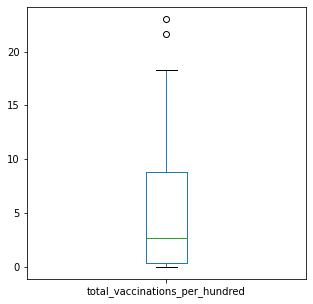

In [92]:
total_vaccination_low_woman_parlament.plot.box()

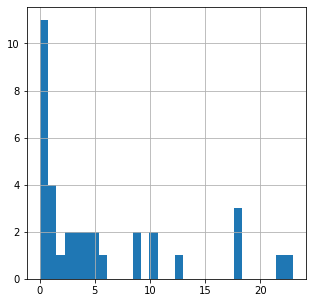

In [93]:
total_vaccination_low_woman_parlament.hist(bins=30)

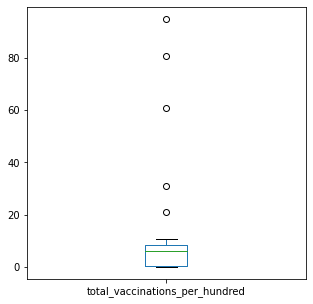

In [94]:
total_vaccination_high_woman_parlament.plot.box()

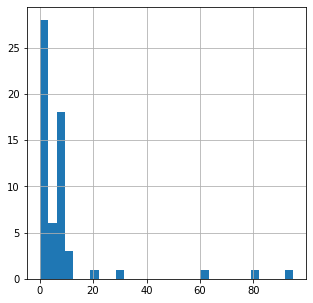

In [95]:
total_vaccination_high_woman_parlament.hist(bins=30)

###Grupos separados, porém com outliers. Removendo outliers para realizar teste de hipótese
>Como verificado acima, principalmente o high_woman palarment tem outliers muito fortes quando verifica-se o total_vaccinations_per_hundred. A retirada destes outliers é importante para efetuar o teste de hipótese.

In [96]:
total_vaccination_low_woman_parlament_without_outliers = remove_outliers(total_vaccination_low_woman_parlament)
total_vaccination_low_woman_parlament_without_outliers

 Serie had 2 outliers removed
Data reduced by 2 lines, or 5.71 %


iso_code
AZE     0.64
BGR     3.22
BHR    17.70
BRA     3.98
BRB    12.79
CHL    18.26
COL     0.29
CYP     8.70
EGY     0.00
GRC     8.84
GTM     0.01
HRV     5.19
HUN    10.09
IDN     0.98
IND     1.04
JOR     1.47
JPN     0.03
KWT     4.10
LBN     0.40
LIE     5.82
LKA     2.38
LVA     3.39
MLT    18.03
MMR     0.19
MUS     0.30
MYS     0.08
OMN     1.32
PAN     2.65
PRY     0.01
QAT     4.86
SAU     2.24
TUR    10.40
UKR     0.01
Name: total_vaccinations_per_hundred, dtype: float64

In [97]:
total_vaccination_high_woman_parlament_without_outliers = remove_outliers(total_vaccination_high_woman_parlament)
total_vaccination_high_woman_parlament_without_outliers

 Serie had 5 outliers removed
Data reduced by 5 lines, or 8.33 %


iso_code
ALB     0.35
AND     3.09
ARG     2.32
AUS     0.13
AUT     7.44
BEL     6.93
BGD     1.89
BLR     0.22
BOL     0.09
CAN     5.18
CHE     8.65
CHN     2.82
CRI     2.94
CZE     6.29
DEU     7.63
DNK    10.61
DOM     0.24
DZA     0.17
ECU     0.24
ESP     8.19
EST     8.50
FIN     8.16
FRA     6.72
GUY     0.24
IRL     8.63
ISL     9.87
ITA     7.20
KAZ     0.12
KHM     0.08
LTU     8.99
LUX     6.04
MAR     9.75
MCO     6.12
MEX     1.96
MNE     0.21
NLD     5.65
NOR     9.06
NPL     1.38
NZL     0.03
PAK     0.03
PER     0.81
POL     8.94
PRT     8.52
ROU     7.91
SEN     0.16
SGP     6.15
SLV     0.09
SMR     0.10
SVK     8.39
SVN     8.39
SWE     7.14
TTO     0.03
URY     0.48
ZAF     0.12
ZWE     0.14
Name: total_vaccinations_per_hundred, dtype: float64

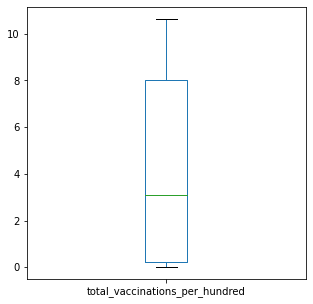

In [98]:
total_vaccination_high_woman_parlament_without_outliers.plot.box()

In [99]:
total_vaccination_high_woman_parlament_without_outliers.mean()

4.209636363636363

In [100]:
total_vaccination_high_woman_parlament_without_outliers.std()

3.767060925107

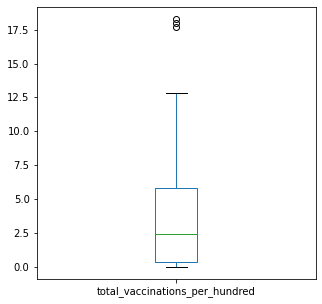

In [101]:
total_vaccination_low_woman_parlament_without_outliers.plot.box()

 Serie had 3 outliers removed
Data reduced by 3 lines, or 9.09 %
 Serie had 1 outliers removed
Data reduced by 1 lines, or 3.33 %
 Serie had 2 outliers removed
Data reduced by 2 lines, or 6.90 %


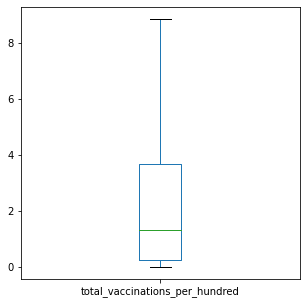

In [102]:
total_vaccination_low_woman_parlament_without_outliers_again = remove_outliers(total_vaccination_low_woman_parlament_without_outliers)
total_vaccination_low_woman_parlament_without_outliers_again = remove_outliers(total_vaccination_low_woman_parlament_without_outliers_again)
total_vaccination_low_woman_parlament_without_outliers_again = remove_outliers(total_vaccination_low_woman_parlament_without_outliers_again)
total_vaccination_low_woman_parlament_without_outliers_again.plot.box()
#Remover outliers até não aparecer mais no boxplot?

In [103]:
total_vaccination_low_woman_parlament_without_outliers_again.mean()

2.3014814814814812

In [104]:
total_vaccination_low_woman_parlament_without_outliers_again.std()

2.588419035900699

In [105]:
total_vaccination_low_woman_parlament_without_outliers.mean()

4.527575757575758

In [106]:
total_vaccination_low_woman_parlament_without_outliers.std()

5.55117500529338

###Analisando grupos separados
>Como verificado, após a remoção dos outliers, os valores ficaram muito semelhantes. Porém, algumas considerações precisam ser feitas. A primeira é que houve muitos países com baixa quantidade de mulheres no parlamento que não encontraram correspondência no conjunto de dados das vacinações. Isto pode ter acontecido porque estes países não entraram no conjunto de dados por não terem iniciado ainda a vacinação. Abaixo, segue uma análise de como foi o processo de separação dos grupos em ambos os conjuntos de dados:

In [107]:
pd.set_option('display.max_rows', None)
country_vaccinations.groupby(by='iso_code').last().merge(woman_paprliaments_without_outliers, on='country', how='outer', indicator=True)[['country', column_name, 'total_vaccinations_per_hundred', '_merge']].sort_values(by='country')
#https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe

,country,Seats held by women in national parliaments %,total_vaccinations_per_hundred,_merge
114,Afghanistan,27.7,NaN,right_only
1,Albania,22.9,0.35,both
29,Algeria,31.6,0.17,both
2,Andorra,32.1,3.09,both
115,Angola,38.2,NaN,right_only
0,Anguilla,NaN,18.41,left_only
116,Antigua and Barbuda,11.1,NaN,right_only
4,Argentina,38.9,2.32,both
117,Armenia,9.9,NaN,right_only
5,Australia,28.7,0.13,both


> É possível perceber alguns países cujo nome não está igual nas duas listas. Isto resulta em uma perca de informação que pode ser útil recuperar a depender do contexto. Neste caso, como são poucos países, acredita-se que isto não será o suficiente para alterar os resultados da análise.

In [108]:
country_vaccinations.groupby(by='iso_code').last().merge(low_woman_paprliaments_without_outliers, on='country', how='right', indicator=True)[['country', column_name, 'total_vaccinations_per_hundred']].sort_values(by='country').count()

country                                          100
Seats held by women in national parliaments %    100
total_vaccinations_per_hundred                    35
dtype: int64

In [109]:
country_vaccinations.groupby(by='iso_code').last().merge(high_woman_paprliaments_without_outliers, on='country', how='right', indicator=True)[['country', column_name, 'total_vaccinations_per_hundred']].sort_values(by='country').count()

country                                          99
Seats held by women in national parliaments %    99
total_vaccinations_per_hundred                   60
dtype: int64

>Dos 100 países com parlamentos com baixa presença feminina, apenas 35 também tem o total de vacinação por cento. Enquanto que este valor é aproximadamente 40% maior para os países com alta presença feminina no parlamento. Se este resultado for porque não entra na tabela de vacinação os países que ainda não começaram a vacinar, esta ausência poderia afetar, caso, ao invés de não informado, houvesse o valor 0, uma média menor no total de vacinações por cento para países com baixa presença feminina no parlamento.

In [110]:
show_outliers(total_vaccination_low_woman_parlament)

 Serie had 33 outliers removed
Data reduced by 33 lines, or 94.29 %


iso_code
MDV    21.67
USA    22.99
Name: total_vaccinations_per_hundred, dtype: float64

In [111]:
show_outliers(total_vaccination_high_woman_parlament)

 Serie had 55 outliers removed
Data reduced by 55 lines, or 91.67 %


iso_code
ARE    60.95
GBR    31.07
ISR    94.88
SRB    21.11
SYC    80.78
Name: total_vaccinations_per_hundred, dtype: float64

In [112]:
pd.reset_option("max_rows")

###Teste de hipótese
>Uma vez obtido a distribuição dos dois grups, aplicaremos o teste de hipótese para verificar se há alguma diferença significativa entre elas. A pergunta a ser respondida será: o total de vacinação por cento é diferente entre os países que tem alto e baixo índice de presença feminina no parlamento?

####Verificando a normalidade das distribuições e pareamento

In [113]:
stats.shapiro(total_vaccination_low_woman_parlament_without_outliers)

(0.7832659482955933, 1.5727675418020226e-05)

In [114]:
stats.shapiro(total_vaccination_high_woman_parlament_without_outliers)

(0.8351520299911499, 2.6330467335355934e-06)

>Os p-values deram menor que 0.00f5 (alpha = 0.01). Isto indica fortemente que estas distribuições não são normais ou, em outras palavras, que a hipótese nula, a distribuição em questão é igual a uma distribuição normal, é rejeitada com uma altíssima chance (1 - pvalue)*100%). Ainda, a chance de ambas as distribuições serem iguais é de pvalue.

>Acerca do pareamento, não são os mesmos países. Portanto, trata-se de distribuições não pareadas.

>Sob estas condições, segundo a tabela do slide da aula de teste de hipótese, utilizar o Mann-Whitney test

####Resultado do teste

In [115]:
stats.mannwhitneyu(total_vaccination_low_woman_parlament_without_outliers, total_vaccination_high_woman_parlament_without_outliers)

MannwhitneyuResult(statistic=877.0, pvalue=0.3979737542951849)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 60%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.

>Com um valor tão alto de pvalue, acredito ser desnecessário tentar organizar os dados para contar com países que entraram na tabela com nomes diferentes. Uma possível variação desta análise seria buscar todos os países do planeta e assumir aqueles que não tem registro de vacinação como zero. Então fazer o mesmo tratamento para verificar se as distribuições, com zeros inclusos, seriam diferentes.

In [116]:
#Nenhum país da lista possui NA nos dados de interesse (último dia de total_vaccinations_per_hundred).
country_vaccinations.groupby(by='country').last()['total_vaccinations_per_hundred'][country_vaccinations.groupby(by='country').last()['total_vaccinations_per_hundred'].isna() == True]

Series([], Name: total_vaccinations_per_hundred, dtype: float64)

##Relação da vacinação por habiante e dados socioeconômico dos países
>O objetivo vai ser imitar uma estrutura parecida com o IDH. Serão criados três índices a partir dos dados socioeconômicos relacionados aos seguintes campos de análise: educação, saúde e renda. Os dados utilizados para a construção deste índice são os seguintes: 

>Educação:
* 34: 'Education: Government expenditure (% of GDP)',
* 95: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) first',
* 155: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) second',
* 96: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) first',
* 156: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) second',
* 97: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first',
* 157: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second',

>Saúde:
* 33: 'Health: Physicians (per 1000 pop.)',
* 32: 'Health: Total expenditure (% of GDP)'
* 31: 'Infant mortality rate (per 1000 live births',
* 87: 'Life expectancy at birth (females/males, years) first',
* 147: 'Life expectancy at birth (females/males, years) second',
* 107: 'Pop. using improved drinking water (urban/rural, %) first',
* 167: 'Pop. using improved drinking water (urban/rural, %) second',

>Renda:
* 8: 'GDP per capita (current US$)',
* 12: 'Employment: Agriculture (% of employed)',
* 13: 'Employment: Industry (% of employed)',
* 14: 'Employment: Services (% of employed)',
* 15: 'Unemployment (% of labour force)',

>A forma como estes dados serão utilizados será a seguinte: dados semelhantes serão utilizados para fazer uma média ponderada. Por exemplo, os dados que tem "first" e "second". O resultado será normalizado para compor o índice de cada uma destas categorias por meio da média normalizada. Estes três índices serão utilizados para tirar outliers.

In [117]:
columns_dict

{0: 'country',
 1: 'Region',
 10: 'Economy: Industry (% of GVA)',
 103: 'Forested area (% of land area) first',
 106: 'Energy supply per capita (Gigajoules) first',
 107: 'Pop. using improved drinking water (urban/rural, %) first',
 11: 'Economy: Services and other activity (% of GVA)',
 12: 'Employment: Agriculture (% of employed)',
 13: 'Employment: Industry (% of employed)',
 136: 'Labour force participation (female/male pop. %) second',
 14: 'Employment: Services (% of employed)',
 147: 'Life expectancy at birth (females/males, years) second',
 148: 'Population age distribution (0-14 / 60+ years, %) second',
 149: 'International migrant stock (000/% of total pop.) second',
 15: 'Unemployment (% of labour force)',
 155: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) second',
 156: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) second',
 157: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second',
 16: 'Labour force participation (female/male pop. 

In [118]:
country_profiles.columns = country_profiles.columns.map(columns_dict)
country_profiles

,17,22,44,9,10,11,34,95,155,96,156,97,157,12,13,14,45,106,166,26,18,103,163,7,8,6,33,32,41,31,89,149,21,19,20,76,136,87,147,39,40,49,107,167,48,88,148,4,23,3,30,1,38,5,2,42,15,24,25,0
0,125.0,-5121.0,63.0,23.3,23.3,53.3,3.3,91.1,131.6,39.7,70.7,3.7,13.3,61.6,10.0,28.5,5.0,78.2,47.0,5.3,125.0,9.8,0.3,-2.4,623.2,20270.0,0.3,8.2,42.0,68.6,382.4,1.2,-2110.0,1458.0,3568.0,19.3,83.6,63.5,61.0,61.6,8.3,NaN,45.1,27.0,21.43,43.2,4.1,54.4,3.2,35530,1513.1,SouthernAsia,27.7,106.3,652864.0,2.1,8.6,26.7,4.0,Afghanistan
1,134.0,-1222.0,84.0,22.4,26.0,51.7,3.5,111.7,115.5,92.5,98.8,68.1,48.7,41.4,18.3,40.3,36.0,94.9,95.2,1.7,134.0,5.7,2.0,2.6,3984.2,11541.0,1.3,5.9,130.0,14.6,57.6,2.0,-2707.0,1962.0,4669.0,40.2,61.0,79.9,75.6,106.4,63.3,NaN,95.5,90.2,2.96,17.4,19.0,106.9,-0.1,2930,8.8,SouthernEurope,22.9,101.9,28748.0,28.2,15.8,57.4,2.2,Albania
2,160.0,-27229.0,5900.0,12.2,37.3,50.5,NaN,112.7,119.5,101.7,98.1,45.1,28.9,10.8,34.5,54.7,55.0,84.3,81.8,3.0,161.0,145.4,3.7,3.8,4154.1,164779.0,NaN,7.2,135.0,27.7,242.4,0.6,-17099.0,29992.0,47091.0,17.0,70.7,76.5,74.1,113.0,38.2,NaN,89.8,82.2,0.05,29.3,9.4,17.3,2.0,41318,99.8,NorthernAfrica,31.6,102.0,2381741.0,0.8,11.4,70.7,2.8,Algeria
3,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,2.6,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,9.6,23.2,41.8,NaN,NaN,NaN,NaN,NaN,77.8,71.1,NaN,NaN,NaN,62.5,62.5,NaN,33.3,9.0,278.2,0.0,56,NaN,Polynesia,NaN,103.6,199.0,87.9,NaN,87.2,-0.1,American Samoa
4,NaN,NaN,1.0,0.5,10.8,88.6,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,100.0,100.0,1.2,NaN,0.5,6.4,0.8,39896.4,2812.0,3.7,8.1,13.0,NaN,42.1,59.7,-1255.0,100.0,1355.0,NaN,NaN,NaN,NaN,88.1,96.9,NaN,100.0,100.0,NaN,14.4,19.0,163.8,-1.6,77,NaN,SouthernEurope,32.1,102.3,468.0,34.0,NaN,85.1,0.1,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,2.1,115.0,0.0,1.6,NaN,NaN,NaN,NaN,NaN,89.0,NaN,2.8,21.7,-51.0,1.0,53.0,NaN,NaN,78.7,72.8,NaN,9.0,NaN,NaN,NaN,NaN,25.5,15.4,84.1,-2.1,12,NaN,Polynesia,NaN,93.4,142.0,41.6,NaN,0.0,0.0,Wallis and Futuna Islands
235,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,27.9,34.7,NaN,NaN,NaN,2.6,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,34.1,5.2,0.9,NaN,NaN,NaN,28.6,83.3,70.3,66.9,NaN,NaN,NaN,NaN,NaN,NaN,28.1,5.4,2.1,1.8,553,NaN,NorthernAfrica,NaN,110.1,266000.0,2.7,6.8,80.9,3.3,Western Sahara
236,136.0,-3026.0,668.0,14.7,36.9,48.4,NaN,88.9,105.7,39.5,57.4,6.1,13.7,32.9,17.9,49.2,12.0,72.0,46.5,4.4,137.0,22.7,0.9,-28.1,1106.4,29688.0,0.3,5.6,298.0,47.2,344.1,1.3,-6291.0,570.0,6861.0,26.2,73.7,65.6,62.8,68.0,25.1,NaN,92.5,34.1,2.99,39.9,4.6,53.5,2.6,28250,3371.4,WesternAsia,0.0,102.1,527968.0,1.0,16.1,34.6,4.0,Yemen
237,179.0,-768.0,374.0,8.2,32.3,59.5,NaN,104.0,103.3,NaN,NaN,3.4,4.5,54.8,9.9,35.3,26.0,85.6,51.3,5.2,180.0,4.5,0.3,2.9,1311.1,21255.0,0.2,5.0,88.0,53.8,127.9,0.8,-937.0,6505.0,7442.0,69.9,80.9,61.9,57.5,74.5,21.0,NaN,55.6,35.7,3.96,44.8,3.7,23.0,3.0,17094,55.3,EasternAfrica,18.0,98.5,752612.0,65.6,7.4,40.9,4.3,Zambia


In [119]:
IDH = pd.DataFrame()
IDH['education'] = (
    preprocessing.minmax_scale(country_profiles[34]) +
    preprocessing.minmax_scale(country_profiles[95] + country_profiles[155]
                               + 2 * country_profiles[96] + 2 * country_profiles[156]
                               + 3 * country_profiles[97] + 3 * country_profiles[157])) / 4
IDH['health'] = (
    preprocessing.minmax_scale(country_profiles[87] + country_profiles[147]) +
    preprocessing.minmax_scale(country_profiles[107] + country_profiles[167]) +
    preprocessing.minmax_scale(country_profiles[31]) +
    preprocessing.minmax_scale(country_profiles[32]) + 
    preprocessing.minmax_scale(country_profiles[33])) / 5
IDH["rent"] = (preprocessing.minmax_scale(
    country_profiles[12] + 2 * country_profiles[13] + 3 * country_profiles[14] - 4 * country_profiles[15]
    ) + preprocessing.minmax_scale(country_profiles[8])) / 2

IDH = IDH.dropna()
IDH

,education,health,rent
0,0.109121,0.369639,0.186211
1,0.220144,0.466762,0.202821
8,0.301972,0.517112,0.477484
9,0.172056,0.450378,0.228555
11,0.334776,0.586805,0.600589
...,...,...,...
222,0.292480,0.557857,0.596749
223,0.072261,0.242170,0.223296
224,0.295281,0.648802,0.634088
226,0.295281,0.648802,0.634088


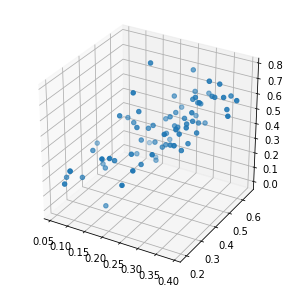

In [120]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])

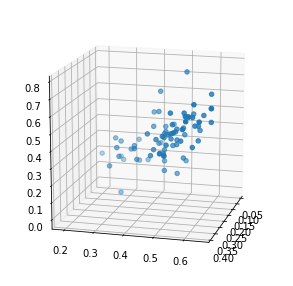

In [121]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])
ax.view_init(15, 15)

###Removendo outliers

In [122]:
clf = LocalOutlierFactor(n_neighbors=3)
scores = clf.fit_predict(IDH)
IDH['scores'] = scores
IDH_outliers = IDH[IDH['scores'] == -1]
IDH = IDH[IDH['scores'] == 1].drop(['scores'], axis=1)
IDH

,education,health,rent
0,0.109121,0.369639,0.186211
1,0.220144,0.466762,0.202821
8,0.301972,0.517112,0.477484
9,0.172056,0.450378,0.228555
11,0.334776,0.586805,0.600589
...,...,...,...
222,0.292480,0.557857,0.596749
223,0.072261,0.242170,0.223296
224,0.295281,0.648802,0.634088
226,0.295281,0.648802,0.634088


In [123]:
outliers_country_profile = country_profiles[country_profiles.index.isin(IDH_outliers.index)]
outliers_country_profile.columns = outliers_country_profile.columns.map(columns_dict)
outliers_country_profile['country']

121    Luxembourg
141    Mozambique
171       Romania
184        Serbia
Name: country, dtype: object

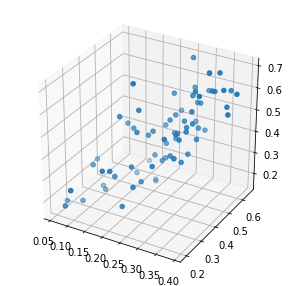

In [124]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])

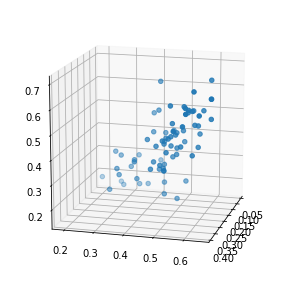

In [125]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])
ax.view_init(15, 15)

###Criando o índice e discretizando os países

In [126]:
IDH

,education,health,rent
0,0.109121,0.369639,0.186211
1,0.220144,0.466762,0.202821
8,0.301972,0.517112,0.477484
9,0.172056,0.450378,0.228555
11,0.334776,0.586805,0.600589
...,...,...,...
222,0.292480,0.557857,0.596749
223,0.072261,0.242170,0.223296
224,0.295281,0.648802,0.634088
226,0.295281,0.648802,0.634088


In [127]:
IDH['IDH']= (IDH['education'] + IDH['health'] + IDH['rent']) / 3
IDH_intervals = pd.cut(IDH['IDH'], bins=3).drop_duplicates().reset_index(drop=True)
IDH_intervals

0    (0.152, 0.282]
1    (0.282, 0.411]
2    (0.411, 0.541]
Name: IDH, dtype: category
Categories (3, interval[float64]): [(0.152, 0.282] < (0.282, 0.411] < (0.411, 0.541]]

In [128]:
IDH['IDH_classes'] = IDH['IDH'].apply(lambda x: 'low' if x in IDH_intervals[0] else 'medium' if x in IDH_intervals[1] else 'hight')
IDH

,education,health,rent,IDH,IDH_classes
0,0.109121,0.369639,0.186211,0.221657,low
1,0.220144,0.466762,0.202821,0.296576,medium
8,0.301972,0.517112,0.477484,0.432189,hight
9,0.172056,0.450378,0.228555,0.283663,medium
11,0.334776,0.586805,0.600589,0.507390,hight
...,...,...,...,...,...
222,0.292480,0.557857,0.596749,0.482362,hight
223,0.072261,0.242170,0.223296,0.179242,low
224,0.295281,0.648802,0.634088,0.526057,hight
226,0.295281,0.648802,0.634088,0.526057,hight


###Teste de hipótese
* Verificar outliers
* Verificar normalidade
* Verificar se as distribuições do total de vacinas por cento desses grupos de países são iguais. Realizar 3 testes de hipóteses, cada um com um par das classes de IDH

### Verificando normalidade



Retornando os nomes das colunas para string

In [129]:
country_profiles.columns = country_profiles.columns.map(columns_dict)

Fazendo separação de grupos de porcentagem total de vacinação por países.

In [130]:
total_vaccinations_per_hundred_last = country_vaccinations.groupby(by='country').last()
total_vaccinatinos_profiles_idh = pd.merge(country_profiles, total_vaccinations_per_hundred_last, on = 'country')


Separando os grupos de vacinação por classes do IDH

In [131]:
low_idh = IDH[IDH['IDH_classes'] == 'low']
medium_idh = IDH[IDH['IDH_classes'] == 'medium']
high_idh = IDH[IDH['IDH_classes'] == 'hight']


In [132]:
total_vaccinatinos_profiles_idh_low = total_vaccinatinos_profiles_idh[total_vaccinatinos_profiles_idh.index.isin(low_idh.index)]
total_vaccinatinos_profiles_idh_medium = total_vaccinatinos_profiles_idh[total_vaccinatinos_profiles_idh.index.isin(medium_idh.index)]
total_vaccinatinos_profiles_idh_high = total_vaccinatinos_profiles_idh[total_vaccinatinos_profiles_idh.index.isin(high_idh.index)]

#### Testando normalidade de países com IDH baixo

Analisando os dados de porcentagem de vacinação dos países com IDH calculados como BAIXO, vemos que o país com índice 98 - Emirados Árabes Unidos - possui alta porcentagem de vacinação, configurando-se um outlier para a amostra.

In [133]:
total_vaccinatinos_profiles_idh_low['total_vaccinations_per_hundred']

0      0.35
16     3.22
21     2.82
23     2.94
33     8.16
41    10.09
97     0.01
98    60.95
Name: total_vaccinations_per_hundred, dtype: float64

Removendo outliers, no caso, será feita a remoção do país cujo total de vacinação seja alto

In [134]:
total_vaccinatinos_profiles_idh_low_withou_outliers = remove_outliers(total_vaccinatinos_profiles_idh_low, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 1 outliers removed
Data reduced by 1 lines, or 12.50 %


Fazendo teste de normalidade para grupo com IDH baixo da variável ***total_vaccinations_per_hundred***

In [135]:
stats.shapiro(total_vaccinatinos_profiles_idh_low_withou_outliers['total_vaccinations_per_hundred'])

(0.8734356760978699, 0.1988677829504013)

Para os testes de países cujo o IDH é baixo, os p-values deram maior que 0.00f5 (alpha = 0.01). Isto indica fortemente que estas distribuição é normal ou, em outras palavras, que a hipótese nula, a distribuição em questão é igual a uma distribuição normal, não pode ser rejeitada, por uma probabilidade de (1 - pvalue)*100%).

#### Testando normalidade de países com IDH médio

Analisando os dados de porcentagem de vacinação dos países com IDH calculados como médio, vemos que o país com índice 99 - Inglaterra - possui porcentagem de vacinação discrepante em relação a mediana, configurando-se um outlier para a amostra.

In [136]:
total_vaccinatinos_profiles_idh_medium['total_vaccinations_per_hundred']

1      0.17
9      1.89
15     3.98
29     0.24
32     8.50
35     7.63
53     3.39
63     6.12
79     7.91
95    10.40
99    31.07
Name: total_vaccinations_per_hundred, dtype: float64

Removendo outliers, no caso, será feita a remoção do país cujo total de vacinação seja discrepante

In [137]:
show_outliers(total_vaccinatinos_profiles_idh_medium, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 10 outliers removed
Data reduced by 10 lines, or 90.91 %


,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Region,Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
99,108.0,-122571.0,4482.0,0.7,19.4,79.9,5.7,108.1,108.4,130.4,125.3,64.1,49.0,1.2,18.4,80.4,116.0,100.0,100.0,1.9,108.0,419.8,6.5,2.2,44162.4,2858003.0,2.8,9.1,102.0,4.1,8543.1,13.2,-219713.0,415856.0,635570.0,57.0,68.6,82.8,79.0,125.8,92.0,NaN,99.1,99.6,NaN,17.7,23.9,273.6,0.6,66182,151.7,NorthernEurope,30.0,97.4,242495.0,12.9,5.0,82.6,0.9,United Kingdom,GBR,2021-02-28,21091267.0,20275451.0,815816.0,205584.0,391872.0,31.07,29.87,1.2,5773.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [138]:
total_vaccinatinos_profiles_idh_medium_withou_outliers = remove_outliers(total_vaccinatinos_profiles_idh_medium, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 1 outliers removed
Data reduced by 1 lines, or 9.09 %


Fazendo teste de normalidade para grupo com IDH médio da variável ***total_vaccinations_per_hundred***

In [139]:
stats.shapiro(total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred'])

(0.9366109371185303, 0.5159540772438049)

Para os testes de países cujo o IDH é médio, os p-values deram maior que 0.00f5 (alpha = 0.01). Isto indica fortemente que estas distribuição é normal ou, em outras palavras, que a hipótese nula, a distribuição em questão é igual a uma distribuição normal, não pode ser rejeitada, por uma probabilidade de (1 - pvalue)*100%).

#### Testando normalidade de países com IDH alto

Analisando os dados de porcentagem de vacinação dos países com IDH calculados como alta, vemos que o país com índice 19 - Ilhas Cayman - possui porcentagem bastante discrepante em relação a mediana

In [140]:
total_vaccinatinos_profiles_idh_high['total_vaccinations_per_hundred']

8      17.70
11      0.22
12      6.93
18      5.18
19     32.12
51      0.12
55      5.82
56      8.99
59     21.67
68      5.65
73      2.65
74      0.01
80      1.76
96     16.62
101     0.48
Name: total_vaccinations_per_hundred, dtype: float64

Removendo outliers, no caso, será feita a remoção do país cujo total de vacinação seja muito distante da média

In [141]:
show_outliers(total_vaccinatinos_profiles_idh_high, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 14 outliers removed
Data reduced by 14 lines, or 93.33 %


,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Region,Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
19,104.0,NaN,NaN,0.3,7.5,92.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,15.5,83.6,130.0,97.4,NaN,NaN,104.0,0.5,9.2,0.7,62132.0,3726.0,NaN,NaN,74.0,NaN,23.7,39.6,-972.0,18.0,991.0,80.6,85.6,NaN,NaN,155.5,77.0,NaN,95.6,NaN,NaN,18.3,6.7,256.5,1.5,62,0.1,Caribbean,NaN,100.4,264.0,52.9,6.3,100.0,1.5,Cayman Islands,CYM,2021-02-25,21106.0,12710.0,7758.0,638.0,586.0,32.12,19.34,11.8,8917.0,Pfizer/BioNTech,Cayman Islands Government,https://www.exploregov.ky/coronavirus-statisti...


In [142]:
total_vaccinatinos_profiles_idh_high_withou_outliers = remove_outliers(total_vaccinatinos_profiles_idh_high, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 1 outliers removed
Data reduced by 1 lines, or 6.67 %


Fazendo teste de normalidade para grupo com IDH alto da variável ***total_vaccinations_per_hundred***

In [143]:
stats.shapiro(total_vaccinatinos_profiles_idh_high_withou_outliers['total_vaccinations_per_hundred'])

(0.8445433378219604, 0.018742278218269348)

Para os testes de países cujo o IDH é alto, os p-values deram menor que 0.00f5 (alpha = 0.01). Isto indica fortemente que esta distribuição não é normal ou, em outras palavras, que a hipótese nula, em que a distribuição em questão é igual a uma distribuição normal, pode ser rejeitada, por uma probabilidade de (1 - pvalue)*100%).

### Testando Grupos de distribuições

#### Testando países com IDH baixo e médio

In [144]:
stats.mannwhitneyu(total_vaccinatinos_profiles_idh_low_withou_outliers['total_vaccinations_per_hundred'], total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred'])

MannwhitneyuResult(statistic=28.0, pvalue=0.26293109434238304)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 75%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.


#### Testando países com IDH baixo e alto

In [145]:
stats.mannwhitneyu(total_vaccinatinos_profiles_idh_low_withou_outliers['total_vaccinations_per_hundred'], total_vaccinatinos_profiles_idh_high_withou_outliers['total_vaccinations_per_hundred'])

MannwhitneyuResult(statistic=42.5, pvalue=0.3271582764029293)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 70%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.


In [146]:
total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred']

1      0.17
9      1.89
15     3.98
29     0.24
32     8.50
35     7.63
53     3.39
63     6.12
79     7.91
95    10.40
Name: total_vaccinations_per_hundred, dtype: float64

#### Testando países com IDH médio e alto

In [147]:
stats.mannwhitneyu(total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred'], total_vaccinatinos_profiles_idh_high_withou_outliers['total_vaccinations_per_hundred'])

MannwhitneyuResult(statistic=68.0, pvalue=0.46500549665684865)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 55%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.


##Visualizando Dados

Gráfico de vacinação diária no Brasil. Podemos perceber que há uma variação.
Do dia 17/01 até o dia o dia 01/02 a quantidade de pessoas vacinadas por dia só aumentou, depois ficou oscilando

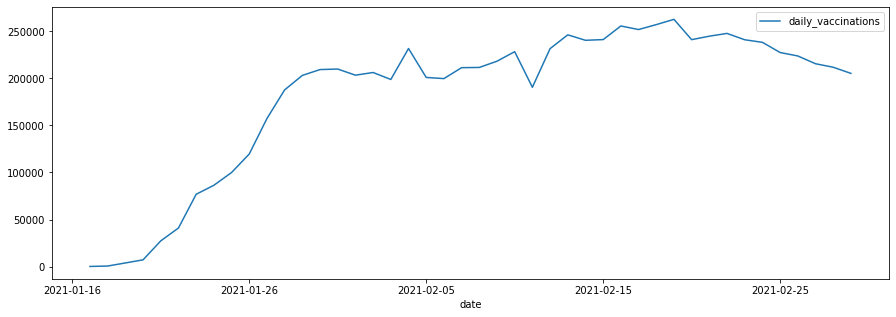

In [148]:
br_vaccionations = country_vaccinations[country_vaccinations['country'] == 'Brazil']
br_vaccionations.plot(x='date', y='daily_vaccinations', figsize=(15,5))

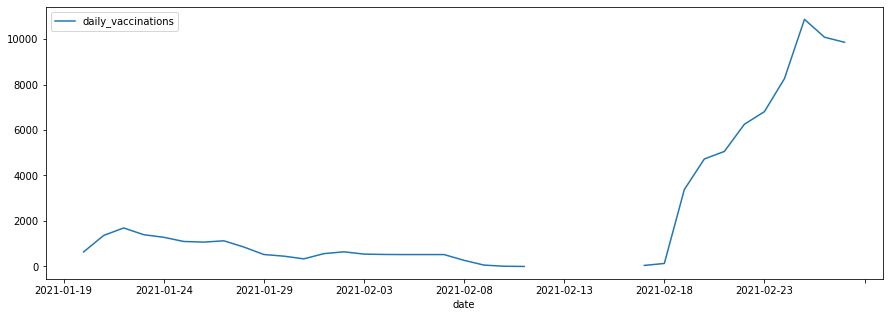

In [149]:
panama_vaccinations = country_vaccinations[country_vaccinations['country'] == 'Panama']
panama_vaccinations.plot(x='date', y='daily_vaccinations', figsize=(15,5))

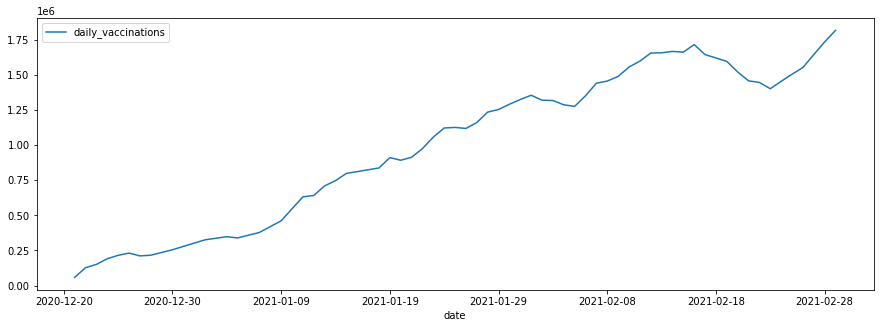

In [150]:
usa_vaccinations = country_vaccinations[country_vaccinations['country'] == 'United States']
usa_vaccinations.plot(x='date', y='daily_vaccinations', figsize=(15,5))

In [151]:
country_profiles_vaccination.corr()

,Agricultural production index (2004-2006=100),"Balance of payments, current account (million US$)",CO2 emission estimates (million tons/tons per capita),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.) first,Education: Primary gross enrol. ratio (f/m per 100 pop.) second,Education: Secondary gross enrol. ratio (f/m per 100 pop.) first,Education: Secondary gross enrol. ratio (f/m per 100 pop.) second,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first,Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules) first,Energy supply per capita (Gigajoules) second,"Fertility rate, total (live births per woman)",Food production index (2004-2006=100),Forested area (% of land area) first,Forested area (% of land area) second,"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),GDP: Gross domestic product (million current US$),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Individuals using the Internet (per 100 inhabitants),Infant mortality rate (per 1000 live births,International migrant stock (000/% of total pop.) first,International migrant stock (000/% of total pop.) second,International trade: Balance (million US$),International trade: Exports (million US$),International trade: Imports (million US$),Labour force participation (female/male pop. %) first,Labour force participation (female/male pop. %) second,"Life expectancy at birth (females/males, years) first","Life expectancy at birth (females/males, years) second",Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Net Official Development Assist. received (% of GNI),"Pop. using improved drinking water (urban/rural, %) first","Pop. using improved drinking water (urban/rural, %) second","Pop. using improved sanitation facilities (urban/rural, %)","Population age distribution (0-14 / 60+ years, %) first","Population age distribution (0-14 / 60+ years, %) second","Population density (per km2, 2017)",Population growth rate (average annual %),Population in thousands (2017),Refugees and others of concern to UNHCR (in thousands),Seats held by women in national parliaments %,"Sex ratio (m per 100 f, 2017)",Surface area (km2),Threatened species (number),Unemployment (% of labour force),Urban population (% of total population),Urban population growth rate (average annual %),total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
Agricultural production index (2004-2006=100),1.000000,0.027989,0.100298,0.358334,0.368406,-0.489150,-0.313413,0.173346,0.173373,-0.207380,-0.315676,-0.343730,-0.419872,0.298852,0.263646,-0.418577,0.152443,-0.340938,-0.392369,0.379960,0.998941,0.095149,0.227674,0.034169,-0.212358,0.004851,-0.469508,-0.434477,0.118438,0.417539,-0.075208,0.117349,0.056666,-0.025336,-0.044111,-0.100277,0.477106,-0.465015,-0.371393,0.165371,-0.257867,NaN,-0.328990,-0.366464,0.138129,0.402763,-0.479017,0.055255,0.392526,0.195498,0.043141,-0.265789,0.180500,0.109396,-0.155326,-0.227605,0.009644,0.396549,-0.000928,0.030395,0.028029,0.052277,0.032631,-0.169631,-0.020161,-0.055641,-0.231730
"Balance of payments, current account (million US$)",0.027989,1.000000,-0.179650,0.043394,0.173870,-0.171044,-0.032933,0.024644,0.023827,0.010166,0.020671,-0.132415,-0.051294,0.075383,0.120482,-0.135265,-0.080411,0.007261,0.018879,-0.145470,0.020554,0.048031,-0.092495,0.085950,-0.059723,-0.375370,0.078440,-0.266553,-0.262865,-0.047323,-0.635670,-0.010912,0.9571

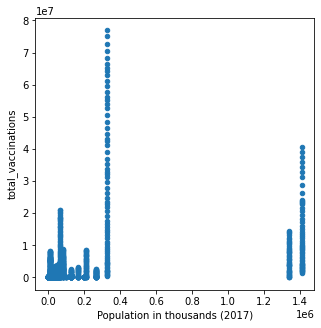

In [152]:
country_profiles_vaccination.plot.scatter(x='Population in thousands (2017)', y='total_vaccinations')